In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from flow_utils import *
from Plot_utils import *
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
_csv='/Users/ssa195/Downloads/dt8122-2022-main/datasets/boomerang.csv'
_data=Dataset2D(csv_file=_csv)
train_dataloader, test_dataloader = get_train_test_loader(_csv)

In [3]:
torch.manual_seed(0)

In [4]:
def make_net():
    return nn.Sequential(nn.Linear(1,32), nn.ReLU(),
                       nn.Linear(32, 32), nn.ReLU(),
                       nn.Linear(32,2))

In [5]:

flow = NVP_flow([

  CouplingBijection(make_net()), ReverseBijection(),
  CouplingBijection(make_net()), ReverseBijection(),
  CouplingBijection(make_net()), ReverseBijection(),
  CouplingBijection(make_net()), ReverseBijection(),
  # CouplingBijection(make_net()), ReverseBijection(),
  # CouplingBijection(make_net()), ReverseBijection(),
  CouplingBijection(make_net()),
]).to(device)

print(flow)

NVP_flow(
  (bijections): ModuleList(
    (0): CouplingBijection(
      (net): Sequential(
        (0): Linear(in_features=1, out_features=32, bias=True)
        (1): ReLU()
        (2): Linear(in_features=32, out_features=32, bias=True)
        (3): ReLU()
        (4): Linear(in_features=32, out_features=2, bias=True)
      )
    )
    (1): ReverseBijection()
    (2): CouplingBijection(
      (net): Sequential(
        (0): Linear(in_features=1, out_features=32, bias=True)
        (1): ReLU()
        (2): Linear(in_features=32, out_features=32, bias=True)
        (3): ReLU()
        (4): Linear(in_features=32, out_features=2, bias=True)
      )
    )
    (3): ReverseBijection()
    (4): CouplingBijection(
      (net): Sequential(
        (0): Linear(in_features=1, out_features=32, bias=True)
        (1): ReLU()
        (2): Linear(in_features=32, out_features=32, bias=True)
        (3): ReLU()
        (4): Linear(in_features=32, out_features=2, bias=True)
      )
    )
    (5): Revers

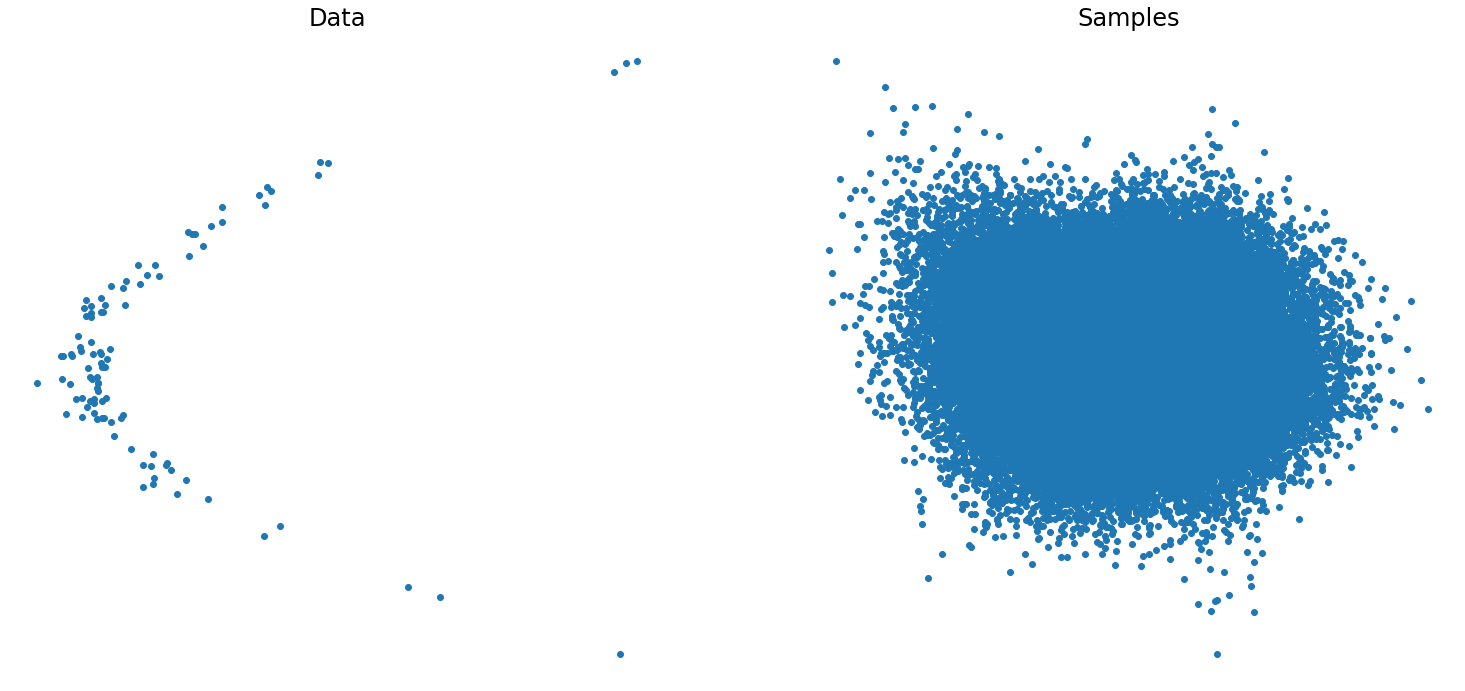

In [6]:
# Plot model samples at initialization
initial_flow=flow.sample(128000)
plot_samples(test_dataloader,initial_flow)

In [7]:
optimizer = torch.optim.Adam(flow.parameters(), lr=1e-4)
epochs = 500

print('Training...')
flow = flow.train()
for epoch in range(epochs):
    print("epoch:", epoch)
    loss_sum = 0.0
    for i, (x,y,data) in enumerate(train_dataloader):
        data=data.type(torch.FloatTensor).to(device)
        optimizer.zero_grad()
        loss = -flow.log_prob(data).mean().to(device)
        #print("l:",loss)
        loss.backward()
        optimizer.step()
        loss_sum += loss.detach().cpu().item()
    print('Epoch: {}/{}, Loss: {:.3f}'.format(epoch+1, epochs, loss_sum/len(data)))

    if epoch % 5 == 0:
        torch.save(flow, '/Users/ssa195/Downloads/dt8122-2022-main/nvp_trained_boomerang/model.pt')

Training...
epoch: 0
Epoch: 1/500, Loss: 33.328
epoch: 1
Epoch: 2/500, Loss: 21.762
epoch: 2
Epoch: 3/500, Loss: 16.720
epoch: 3
Epoch: 4/500, Loss: 14.156
epoch: 4
Epoch: 5/500, Loss: 12.360
epoch: 5
Epoch: 6/500, Loss: 11.127
epoch: 6
Epoch: 7/500, Loss: 10.005
epoch: 7
Epoch: 8/500, Loss: 8.840
epoch: 8
Epoch: 9/500, Loss: 8.075
epoch: 9
Epoch: 10/500, Loss: 7.774
epoch: 10
Epoch: 11/500, Loss: 7.252
epoch: 11
Epoch: 12/500, Loss: 6.871
epoch: 12
Epoch: 13/500, Loss: 6.460
epoch: 13
Epoch: 14/500, Loss: 6.239
epoch: 14
Epoch: 15/500, Loss: 6.060
epoch: 15
Epoch: 16/500, Loss: 5.966
epoch: 16
Epoch: 17/500, Loss: 5.843
epoch: 17
Epoch: 18/500, Loss: 5.661
epoch: 18
Epoch: 19/500, Loss: 5.503
epoch: 19
Epoch: 20/500, Loss: 5.420
epoch: 20
Epoch: 21/500, Loss: 5.345
epoch: 21
Epoch: 22/500, Loss: 5.242
epoch: 22
Epoch: 23/500, Loss: 5.165
epoch: 23
Epoch: 24/500, Loss: 5.059
epoch: 24
Epoch: 25/500, Loss: 4.943
epoch: 25
Epoch: 26/500, Loss: 4.917
epoch: 26
Epoch: 27/500, Loss: 4.903
e

Epoch: 218/500, Loss: 3.451
epoch: 218
Epoch: 219/500, Loss: 3.430
epoch: 219
Epoch: 220/500, Loss: 3.435
epoch: 220
Epoch: 221/500, Loss: 3.435
epoch: 221
Epoch: 222/500, Loss: 3.466
epoch: 222
Epoch: 223/500, Loss: 3.454
epoch: 223
Epoch: 224/500, Loss: 3.437
epoch: 224
Epoch: 225/500, Loss: 3.461
epoch: 225
Epoch: 226/500, Loss: 3.440
epoch: 226
Epoch: 227/500, Loss: 3.432
epoch: 227
Epoch: 228/500, Loss: 3.414
epoch: 228
Epoch: 229/500, Loss: 3.443
epoch: 229
Epoch: 230/500, Loss: 3.451
epoch: 230
Epoch: 231/500, Loss: 3.453
epoch: 231
Epoch: 232/500, Loss: 3.459
epoch: 232
Epoch: 233/500, Loss: 3.442
epoch: 233
Epoch: 234/500, Loss: 3.447
epoch: 234
Epoch: 235/500, Loss: 3.413
epoch: 235
Epoch: 236/500, Loss: 3.423
epoch: 236
Epoch: 237/500, Loss: 3.420
epoch: 237
Epoch: 238/500, Loss: 3.416
epoch: 238
Epoch: 239/500, Loss: 3.433
epoch: 239
Epoch: 240/500, Loss: 3.510
epoch: 240
Epoch: 241/500, Loss: 3.439
epoch: 241
Epoch: 242/500, Loss: 3.417
epoch: 242
Epoch: 243/500, Loss: 3.4

Epoch: 431/500, Loss: 3.347
epoch: 431
Epoch: 432/500, Loss: 3.350
epoch: 432
Epoch: 433/500, Loss: 3.350
epoch: 433
Epoch: 434/500, Loss: 3.382
epoch: 434
Epoch: 435/500, Loss: 3.395
epoch: 435
Epoch: 436/500, Loss: 3.377
epoch: 436
Epoch: 437/500, Loss: 3.369
epoch: 437
Epoch: 438/500, Loss: 3.370
epoch: 438
Epoch: 439/500, Loss: 3.359
epoch: 439
Epoch: 440/500, Loss: 3.368
epoch: 440
Epoch: 441/500, Loss: 3.402
epoch: 441
Epoch: 442/500, Loss: 3.400
epoch: 442
Epoch: 443/500, Loss: 3.374
epoch: 443
Epoch: 444/500, Loss: 3.359
epoch: 444
Epoch: 445/500, Loss: 3.355
epoch: 445
Epoch: 446/500, Loss: 3.363
epoch: 446
Epoch: 447/500, Loss: 3.370
epoch: 447
Epoch: 448/500, Loss: 3.376
epoch: 448
Epoch: 449/500, Loss: 3.365
epoch: 449
Epoch: 450/500, Loss: 3.369
epoch: 450
Epoch: 451/500, Loss: 3.362
epoch: 451
Epoch: 452/500, Loss: 3.389
epoch: 452
Epoch: 453/500, Loss: 3.355
epoch: 453
Epoch: 454/500, Loss: 3.356
epoch: 454
Epoch: 455/500, Loss: 3.361
epoch: 455
Epoch: 456/500, Loss: 3.3

In [8]:
#torch.save(flow, '/Users/ssa195/Downloads/dt8122-2022-main/nvp_trained_boomerang/model.pt')

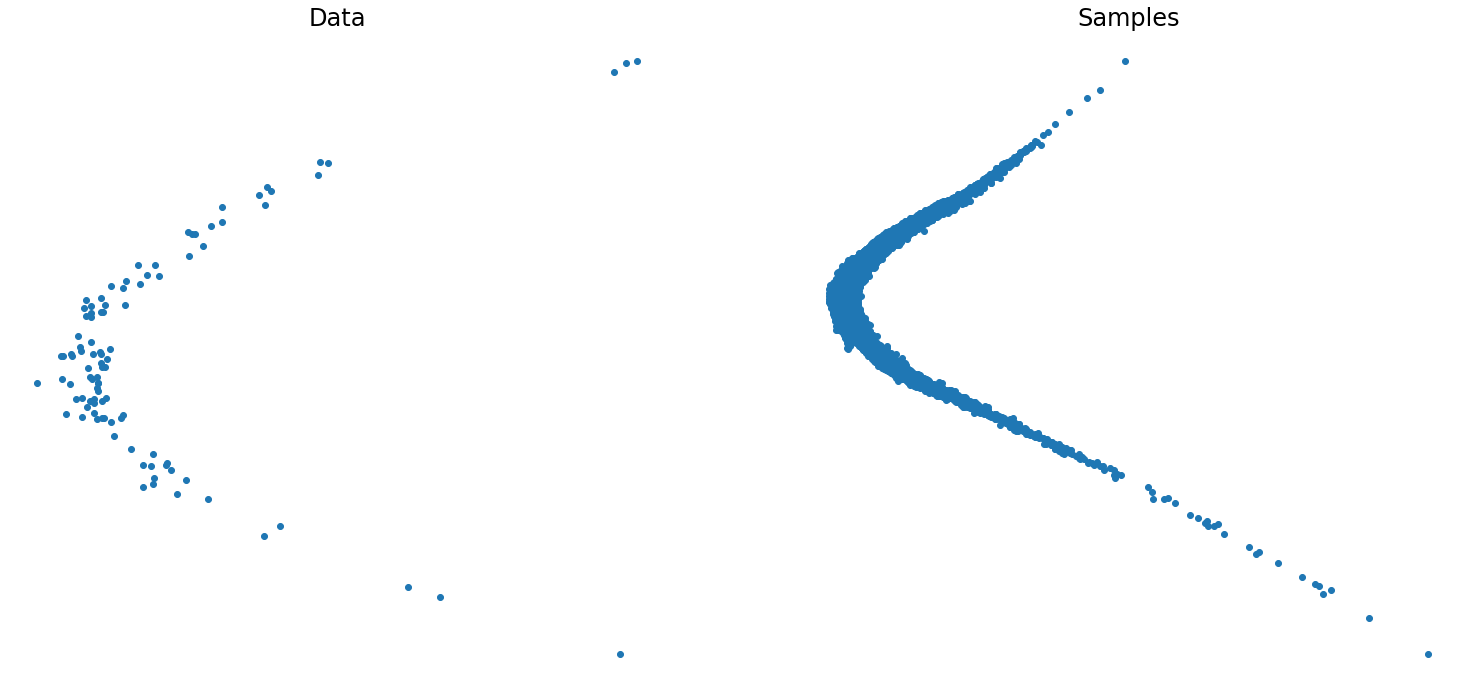

In [9]:
flow = flow.eval()
x_dash=flow.sample(128000)
# Plot model samples after training
plot_samples(test_dataloader,x_dash)

In [10]:
d=None
for x,y,data in test_dataloader:
    #print(x.shape)
    if d is not None:
        d=torch.cat((d,data),dim=0)
    else:
        d=data.clone()

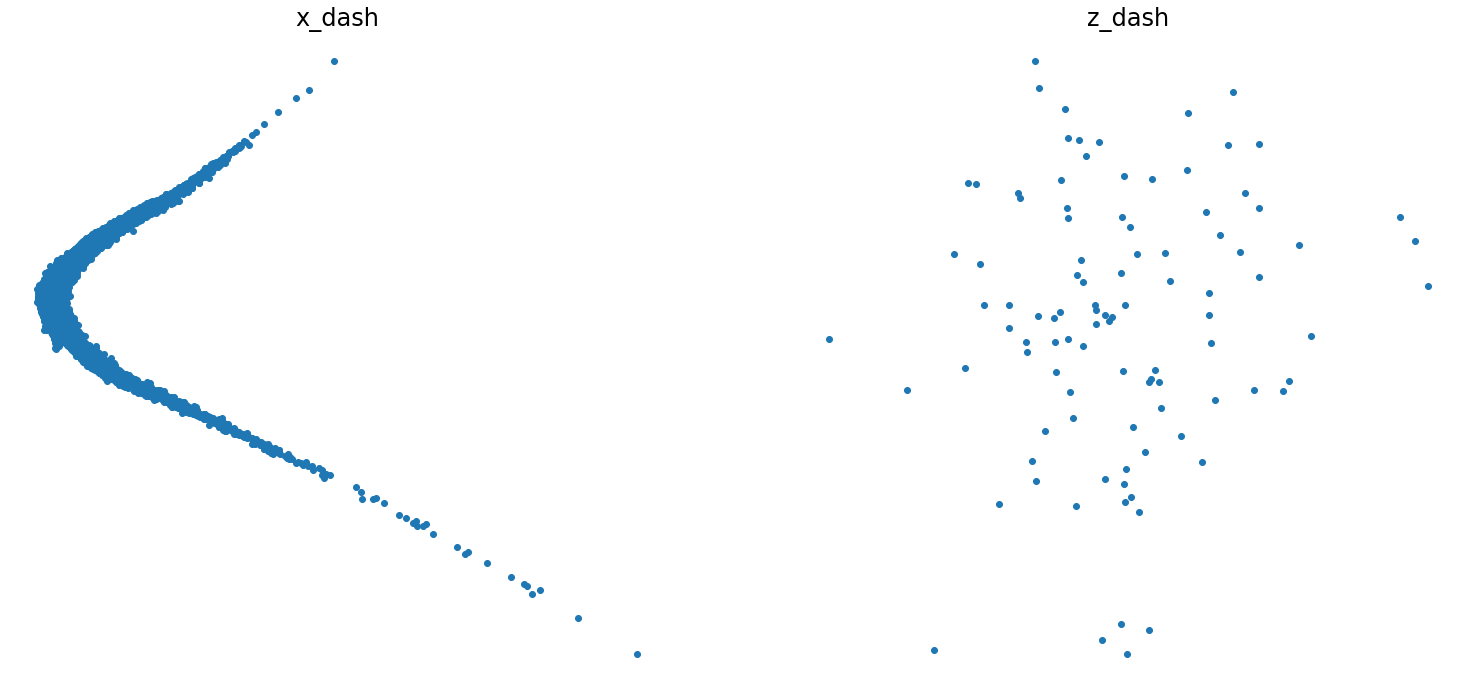

In [11]:
flow = flow.eval()
# inverse
z_dash=flow.prob(d.type(torch.float32))
plot_samples2(x_dash,z_dash)

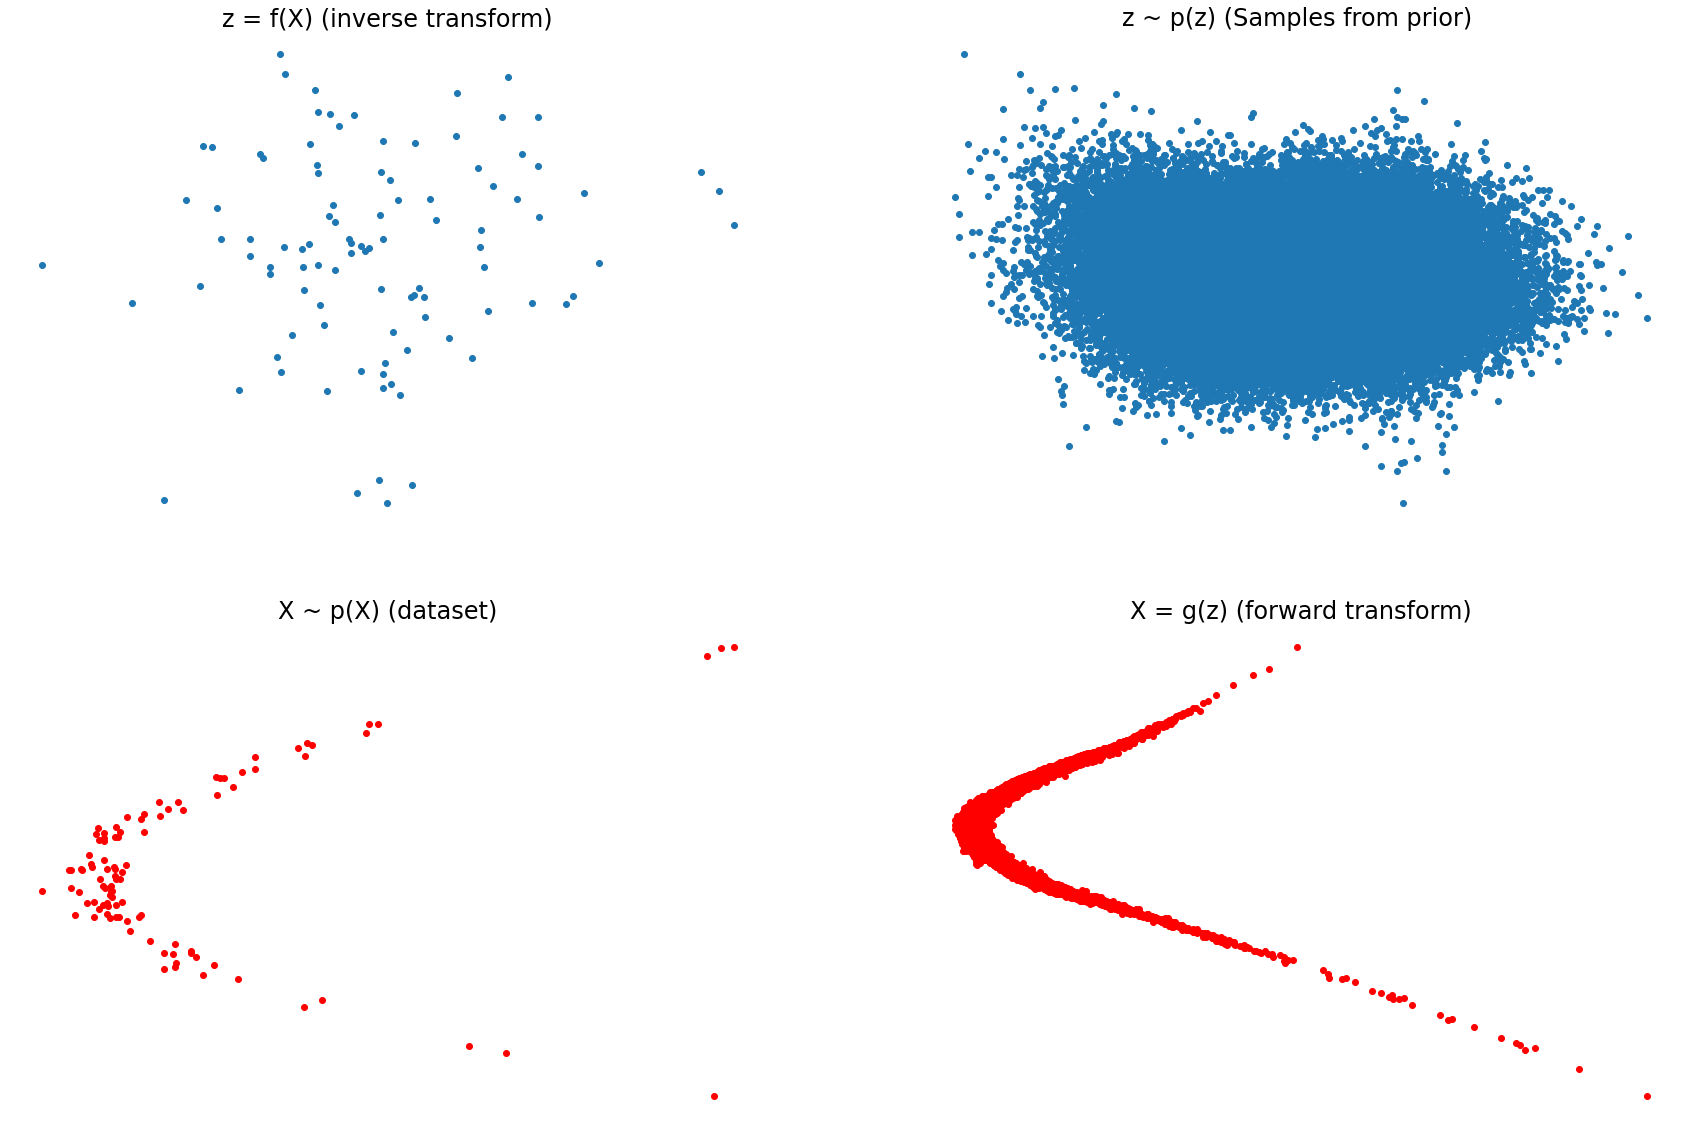

In [12]:
# create final 4 fig subplot
from Plot_utils import plot_final
plot_final(test_dataloader,initial_flow,x_dash,z_dash,'/Users/ssa195/Downloads/dt8122-2022-main/nvp_trained_boomerang/plot1.png')